In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sympy import *

Program ini adalah program untuk meng-*import* suatu module ke dalam program.

Idenya adalah meng-*import* module dan/atau fungsi dari module yang akan digunakan pada program.

Algoritmanya:
1. Meng-*import* module `numpy` dan panggil sebagai `np`.
2. Meng-*import* module `matplotlib.pyplot` dan panggil sebagai `plt.
3. Meng-*import* `tabulate` dari module `tabulate`
4. Meng-*import* seluruh fungsi-fungsi dari module `sympy`

# Pendahuluan
Terdapat beberapa metode dalam metode numerik yang dapat digunakan untuk interpolasi. Beberapa metode tersebut adalah Interpolasi Lagrange dan Newton Divided Difference (NDD).

# 1. Polinomial Interpolasi Lagrange
Polinomial interpolasi digunakan untuk mengaproksimasi fungsi yang hanya diketahui nilainya di beberapa titik. Contohnya, diberikan tiga titik $(0,1)$, $(0.5,0.5)$, $(1,0)$. Bagaimana cara menentukan $f(0.75)$?

Salah satu contoh polinomial interpolasi adalah polinomial interpolasi Lagrange.

Bila diberikan $n+1$ titik di $x_0,x_1,\ldots,x_n$, dan $f$ adalah fungsi yang nilainya pada titik-titik tersebut diberikan, maka **polinomial interpolasi Lagrange ke-n** didefinisikan sebagai

$$P(x)=f(x_0)L_{n,0}(x)+f(x_1)L_{n,1}+\cdots+f(x_n)L_{n,n}(x)=\sum_{k=0}^{n} f(x_k)L_{n,k}(x)$$

dimana untuk setiap $k=0,1,\ldots,n$

$$L_{n,k}(x)=\prod_{i=0,i\neq k}^{n} \frac{(x-x_i)}{(x_k-x_i)} \$$

Kode Python untuk mengintegrasi titik data menggunakan polinom Lagrange adalah seperti di bawah ini.

In [2]:
def LagrangePol(x, x_points, y_points):
    pol = 0 # inisiasi nilai polinom
    n = len(x_points) # cari panjang dari list titik x
    for k in range(n):
        L = 1 # inisiasi nilai L(n.k)
        for i in range(n):
            if i != k: # syarat untuk L
                L *= ((x-x_points[i])/(x_points[k]-x_points[i])) #rumus cari nilai L
        pol += y_points[k]*L # rumus cari nilai P(x)
    return pol

# 2. Newton Divided Difference (NDD)
NDD memiliki bentuk sebagai berikut:

$$P_{n}(x)=f[x_0]+\sum_{k=1}^{n} f[x_0,x_1,\ldots,x_k](x-x_0)(x-x_1)\ldots(x-x_{k-1})$$

dimana $f[x_k]=f(x_k)$ dan

$$f[x_i, x_{i+1}, \ldots, x_{i+k}] = \frac{f[x_{i+1},x_{i+2}, \ldots,x_{i+k}]-f[x_i,x_{i+1}, \ldots, x_{i+k-1}]}{x_{i+k}-x_i}$$

$f[x_i, x_{i+1},\ldots,x_{i+k}]$ disebut **k-th divided difference** relatif terhadap $x_i, x_{i+1},\ldots,x_{i+k}$

Dalam membentuk polinomial interpolasi dengan NDD, seringkali **tabel divided difference** dibuat untuk memudahkan. Tabel tersebut berbentuk seperti berikut.

Ada dua cara pembentukan polinomial interpolasi dengan DD, yaitu cara **Forward** dan **Backward**.

1. Forward DD menggunakan baris paling atas dari setiap kolom pada tabel DD.

$$P_{n}(x)=f[x_0]+\sum_{k=1}^{n} f[x_0,x_1,\ldots,x_k](x-x_0)(x-x_1)\ldots(x-x_{k-1})$$

2. Backward DD menggunakan baris paling akhir dari setiap kolom pada tabel DD.

$$P_{n}(x)=f[x_n]+\sum_{k=1}^{n} f[x_n,x_{n-1},\ldots,x_{n-k}](x-x_n)(x-x_{n-1})\ldots(x-x_{n-k+1})$$

Kode Python untuk menginterpolasi titik-titik data dengan menggunakan DD adalah sebagai berikut.

In [3]:
def DDTableGenerator(x_points, y_points): # Fungsi untuk membuat tabel DD
    DDTable = [y_points] # Kolom-kolom pada tabel
    for column in range(1, len(y_points)):
        DDColumn = [] # Buat list untuk kolom
        for row in range(len(DDTable[-1])-1): # Proses pengisian kolom
            DD = (DDTable[-1][row+1]-DDTable[-1][row])/(x_points[column+row]-x_points[row])
            DDColumn.append(DD)
        DDTable.append(DDColumn) # Tambahkan kolom yang sudah terisi ke tabel
    return DDTable

In [4]:
def ForwardDD(x, x_points, y_points):
    DDTable = DDTableGenerator(x_points, y_points)
    pol = DDTable[0][0] # Nilai adri polinom
    mult_term = 1 # Variabel untuk menyimpan nilai dari (x-x0)(x-x1)
    for k in range(1, len(DDTable)):
        mult_term *= (x-x_points[k-1]) # Menghitung (x-x0)(x-x1)...(x-x(n-1))
        pol += DDTable[k][0] * mult_term # Menghitung nilai interpolasi
    return pol

In [5]:
def BackwardDD(x, x_points, y_points):
    DDTable = DDTableGenerator(x_points, y_points)
    pol = DDTable[0][-1] # Nilai dari polinom
    mult_term = 1 # Variabel untuk menyimpan nilai dari (x-x0)(x-1)
    for k in range(1, len(DDTable)):
        mult_term *= (x-x_points[-k]) # Menghitung (x-x0)(x-x1)...(x-x(n-1))
        pol += DDTable[k][-1] * mult_term # Menghitung nilai interpolasi
    return pol

# Nomor 1

## Code Original

In [6]:
def nomor1():
    titik_x = eval(input("list of x points: ")) # untuk menyimpan list variabel x yang di-input
    titik_y = eval(input("list of y points: ")) # untuk menyimpan list variabel y yang di-input
    eval_x = eval(input("Input x value to be approximated: ")) # untuk menyimpan nilai x yang akan diaproksimasi
    x = Symbol('x') # Agar variabel 'x' dalam program tetap dalam bentuk string

    # Pemilihan metode
    metode = int(input("Choose your preferred method (1 = Lagrange, 2 = NDD): ")) # untuk menyimpan pilihan metode yang akan dilakukan
    if metode==1: # jika user memilih Lagrange
        print("Lagrange polynomial interpolation = ", simplify(LagrangePol(x, titik_x, titik_y))) # cetak hasil penyederhanaan hasil aproksimasi
        y_aproks = LagrangePol(eval_x, titik_x, titik_y) # untuk menyimpan hasil interpolasi lagrange
        print("for x = {0} using Lagrange, y is = {1:.5f} ".format(eval_x, y_aproks)) # cetak hasil aproksimasi dengan format

    elif metode==2: # Jika user memilih NDD
        approx_method = int(input("Forward = 1, Backward = 2: ")) # untuk memilih metode forward/backward

        printable = str(input("Wanna print the DD table? (Y/N): ")).lower() # untuk menyimpan input huruf dari user yang sudah di lowercase
        if printable=="y": # jika user memilih iya
            h = ['x','y'] # buat header tabel
            for i in range(1, len(titik_x)): # isi header DD + angkanya
                h.append("DD" + str(i))
            t = [] # buat tabel
            DDtable = DDTableGenerator(titik_x, titik_y) # buat tabel DD dengan memanggil fungsi yang telah dibuat
            for i in range(len(titik_x)):
                DDrow = [] # buat baris
                DDrow.append(titik_x[i]) # isi baris
                for j in range(len(titik_x)-i):
                    DDrow.append(DDtable[j][i]) # masukan tabel DD ke dalam baris DD
                t.append(DDrow) # masukan baris yang telah dibuat ke tabel
            print(tabulate(t, headers = h, tablefmt = "orgtbl")) # cetak tabel dengan headers 'h' dan format tabel "orgtbl"

        if approx_method == 1: # jika user sebelumnya memilih metode aproksimasi forward
            forw_approx = ForwardDD(eval_x, titik_x, titik_y) # untuk menyimpan hasil panggilan fungsi dengan inputnya
            print("NDD Polynomial = ", simplify(ForwardDD(x,titik_x, titik_y))) # cetak hasil aproksimasi dengan informasi input x-nya
            print("For x = {0}, using Forward NDD, y is approximately: {1:.5f}".format(eval_x,forw_approx)) # cetak titik aprokasimasi serta hasil aproksimasinya dengan format 5 angka di belakang koma bagi hasil interpolasi
        elif approx_method == 2: # jika user sebelumnya memilih metode aproksimasi backward
            back_approx = BackwardDD(eval_x, titik_x, titik_y) # untuk menyimpan hasil panggilan fungsi dengan inputnya
            print("NDD Polynomial = ", simplify(BackwardDD(x,titik_x, titik_y))) # cetak hasil fungsi polinomial yang telah disederhanakan
            print("For x = {0}, using Backward NDD, y is approximately: {1:.5f}".format(eval_x,back_approx)) # cetak titik aprokasimasi serta hasil aproksimasinya dengan format 5 angka di belakang koma bagi hasil interpolasi

    # Pemilihan Output
    show = int(input("Show (1 = table, 2 = plot) : ")) # untuk menyimpan input angka dari user 
    if show == 1: # jika user memilih tabel
        # Proses pembuatan tabel
        Table = [] # buat tabel
        if metode == 1: # jika user sebelumnya memilih metode Lagrange
            polinom = LagrangePol(eval_x,titik_x,titik_y) # simpan hasil interpolasi Lagrange
        if metode == 2: # jika user sebelumnya memilih metode NDD
            if approx_method == 1: # jika user sebelumnya memilih metode forward
                polinom = ForwardDD(eval_x,titik_x,titik_y) # simpan hasil forward NDD
            elif approx_method == 2: # jika user sebelumnya memilih metode backward
                polinom = BackwardDD(eval_x,titik_x,titik_y) # simpan hasil backward NDD

        titik_x.append(eval_x) # masukan input x dari user
        titik_y.append(polinom) # masukan hasil dari interpolasi
        sort = sorted(titik_x) # urutkan list input x dari user
        # Pengisian tabel
        for i in range(len(titik_x)):
            for j in range(len(titik_y)):
                if sort[i] == titik_x[j]: # jika variabel yang sudah diurutkan sama dengan input dari user
                    Table.append([sort[i], titik_y[j]]) # masukan masing-masing dari variabel yang sama tersebut
        print("RESULT") # cetak "RESULT"
        print(tabulate(Table, headers = ['x','y'], tablefmt = "orgtbl")) # tabel dengan header 'x' dan 'y', percantik dengan format tabel "orgtbl"

    elif show == 2: # jika user memilih plot
        if metode == 1: # jika user sebelumnya memilih metode Lagrange
            pers = str(LagrangePol(x,titik_x,titik_y)) # simpan hasil interpolasi Lagrange
        elif metode == 2: # jika user sebelumnya memilih metode NDD
            if approx_method == 1: # jika user sebelumnya memilih metode forward
                pers = str(ForwardDD(x,titik_x,titik_y)) # simpan hasil forward NDD
            elif approx_method == 2: # jika user sebelumnya memilih metode backward
                pers = str(BackwardDD(x,titik_x,titik_y)) # simpan hasil backward NDD
        
        # Buat fungsi yang me-return ke pers
        def f(x):
            return eval(pers)

        # Syntax untuk menampilkan plot
        x1 = np.linspace(titik_x[0],titik_x[len(titik_x)-1],10) # Buat garis linier
        y1 = f(x1) # simpan hasil dari pemasukan x1 ke fungsi
        x2 = eval_x # untuk menyimpan titik x yang diaproksimasi
        y2 = f(x2) # simpan hasil dari pemasukan x2 ke fungsi
        plt.plot(x1,y1,'b-') # Buat plot x1 dan y1 dengan garis biru
        plt.plot(x2,y2,'y-o') # Buat titik yang diinterpolasikan dengan warna kuning
        plt.plot(titik_x,titik_y,'g-') # Buat titik-titik input dengan garis hijau
        plt.xlabel('x') # Buat nama "x" pada sumbu x
        plt.ylabel('y') # Buat nama "y" pada sumbu y
        plt.title("Grafik Input dan Polinomial Interpolasi") # Buat judul
        plt.legend(["polinom interpolasi","titik yang diinterpolasikan","fungsi/titik input"]) # Buat legend dari plot-plot yang telah dibuat
        plt.show() # Tampilkan plot

Program ini adalah program untuk menghitung interpolasi nilai dari sebuah titik.

Idenya adalah menyimpan input dari *user* ke dalam variabel-variabel. Lalu, variabel yang tersimpan tersebut akan langsung digunakan untuk menghitung interpolasi nilai, menentukan metode, serta memberi output hasil interpolasi.

Algoritmanya:
1. Membuat fungsi dengan nama `nomor1()` yang akan diisi dengan program.
1. Meminta *user* untuk mengisi list titik-titik (x), nilainya (y), dan titik yang akan dihitung nilai aproksimasinya. Kemudian simpan input user ke dalam variabel `titik_x`, `titik_y`, dan `eval_x`.
1. Paksa nilai x ke dalam bentuk string dengan fungsi `Symbol()` dari modul Sympy.
1. Meminta *user* untuk memilih satu dari dua metode yang diberikan. Input *user* simpan ke dalam variabel `metode`.
1. Dengan menggunakan `if`/`elif`, akan disesuaikan antara input dari *user* pada metode yang akan dipanggil.
    1. Jika user mengisi angka `1`, maka Interpolasi Lagrange akan dijalankan
        * Cetak penyederhanaan fungsi polinomial yang telah dibentuk program
        * Lakukan aproksimasi nilai y dengan memanggil fungsi yang telah dibuat, yakni `LagrangePol()` dan simpan ke dalam variabel `y_aproks`.
        * Cetak hasil interpolasi dengan format yang telah ditentukan.
    1. Jika user mengisi angka `2`, maka Newton Divided Difference (NDD) akan dijalankan
        * Meminta user untuk memilih metode Forward atau Backward. Simpan input ke dalam variabel `approx_method`
        * Meminta user untuk memilih menampilkan tabel Divided Difference atau tidak. Simpan input user ke dalam variabel `printable`
            * Jika iya, maka akan dilakukan proses pengisian tabel.
                * Buat headers
                * Menggunakan for loop untuk membuat buat headers informasi DD dengan angka di akhirnya
                * Buat tabel kosong
                * Isi variabel `DDtable` dengan memanggil fungsi `DDTableGenerator`
                * Menggunakan for loop dengan titik maksimum panjang `titik_x`, akan dibuat baris yang kemudian baris tersebut diisi dengan variabel dalam tabel
                * Isi baris DD ke dalam tabel
                * Cetak hasil tabel dengan menggunakan fungsi `headers` dan `tablefmt` dari `tabulate`
            * Jika tidak, maka proses pengisian tabel akan dilewati dan lanjut ke proses selanjutnya.
        * Menampilkan hasil interpolasi sesuai dengan metode approksimasinya dan format yang telah ditentukan
1. Meminta user untuk memilih hasil output (bentuk tabel atau plot).
    1. Jika user memilih tabel (1), maka akan dilakukan proses pengisian tabel dan tabel akan dipercantik dengan module `tabulate`
    1. Jika user memilih plot (2), maka akan dilakukan proses pembuatan plot dengan module `matplotlib.pyplot`

### Contoh Running Program

list of x points: [0,2,3,4,7,9]
list of y points: [4,26,58,112,466,922]
Input x value to be approximated: 1
Choose your preferred method (1 = Lagrange, 2 = NDD): 2
Forward = 1, Backward = 2: 2
Wanna print the DD table? (Y/N): y
|   x |   y |   DD1 |   DD2 |   DD3 |   DD4 |   DD5 |
|-----+-----+-------+-------+-------+-------+-------|
|   0 |   4 |    11 |     7 |     1 |     0 |     0 |
|   2 |  26 |    32 |    11 |     1 |     0 |       |
|   3 |  58 |    54 |    16 |     1 |       |       |
|   4 | 112 |   118 |    22 |       |       |       |
|   7 | 466 |   228 |       |       |       |       |
|   9 | 922 |       |       |       |       |       |
NDD Polynomial =  1.0*x**3 + 2.0*x**2 + 3.0*x + 4.0
For x = 1, using Backward NDD, y is approximately: 10.00000
Show (1 = table, 2 = plot) : 2


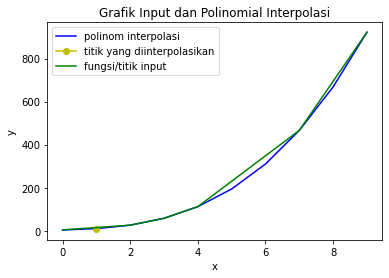

In [9]:
nomor1()

Contoh Lagrange

In [ ]:
nomor1()

list of x points: [0,2/3,1]
list of y points: [1,1/2,0]
Input x value to be approximated: 1/2
Choose your preferred method (1 = Lagrange, 2 = NDD): 2
Forward = 1, Backward = 2: 1
Wanna print the DD table? (Y/N): y
|        x |   y |   DD1 |   DD2 |
|----------+-----+-------+-------|
| 0        | 1   | -0.75 | -0.75 |
| 0.666667 | 0.5 | -1.5  |       |
| 1        | 0   |       |       |
NDD Polynomial =  -0.75*x**2 - 0.25*x + 1.0
For x = 0.5, using Forward NDD, y is approximately: 0.68750


Contoh NDD

list of x points: [5,7,11,13,17]
list of y points: [150,392,1452,2366,5202]
Input x value to be approximated: 9
Choose your preferred method (1 = Lagrange, 2 = NDD): 1
Lagrange polynomial interpolation =  x**2*(x + 1)
for x = 9 using Lagrange, y is = 810.00000 
Show (1 = table, 2 = plot) : 2


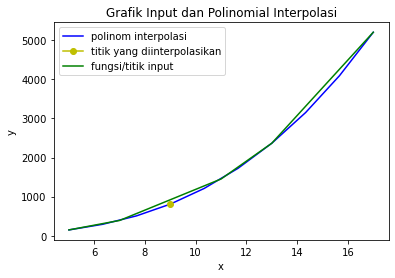

In [32]:
nomor1()

In [33]:
nomor1()

list of x points: [0,1,2,3,4,5,6]
list of y points: [0,1,8,27,64,125,216]
Input x value to be approximated: 3.25
Choose your preferred method (1 = Lagrange, 2 = NDD): 1
Lagrange polynomial interpolation =  x**3
for x = 3.25 using Lagrange, y is = 34.32812 
Show (1 = table, 2 = plot) : 1
RESULT
|    x |        y |
|------+----------|
| 0    |   0      |
| 1    |   1      |
| 2    |   8      |
| 3    |  27      |
| 3.25 |  34.3281 |
| 4    |  64      |
| 5    | 125      |
| 6    | 216      |


## Code Bonus

In [29]:
def bonus1():
    while True:
        x = Symbol('x') # Agar variabel 'x' dalam program tetap dalam bentuk string

        # Memilih preferensi input List atau Fungsi
        preferences = int(input("Select your preferences, (1 = List, 2 = Fungsi): ")) # meminta user memilih preferensi input
        if preferences == 1: # jika user memilih list
            titik_x = eval(input("list of x points: ")) # untuk menyimpan input list x user
            titik_y = eval(input("list of y points: ")) # untuk menyimpan input list y user

        elif preferences == 2: # jika user memilih fungsi
            function = input("Input function: ") # untuk menyimpan input user
            fungsi = parse_expr(function) #ubah input agar dapat di proses
            lower_bound = eval(input('lower bound: ')) # untuk menyimpan input user
            upper_bound = eval(input('upper bound: ')) # untuk menyimpan input user
            partition = eval(input("part: ")) # untuk menyimpan jumlah partisi yang diinput user
            step = ((upper_bound+1)-lower_bound)/partition # cari langkah agar partisi sesuai

            titik_x = [] # buat list variabel x
            titik_y = [] # buat list variabel y
            
            # Proses pengisian list dari fungsi
            while lower_bound <= upper_bound:
                titik_x.append(lower_bound) # masukan titik awal ke list titik_x
                
                fx = fungsi.subs(x, lower_bound) # substitusi variabel x dengan titik x
                titik_y.append(fx) # masukan hasil substitusi ke list titik_y
                
                lower_bound += step # tambah lower bound sesuai dengan stepnya

        eval_x = eval(input("Input x value to be approximated: ")) # untuk menyimpan nilai x yang akan diaproksimasi

        # Pemilihan metode
        metode = int(input("Choose your preferred method (1 = Lagrange, 2 = NDD): ")) # untuk menyimpan pilihan metode yang akan dilakukan
        if metode==1: # jika user memilih Lagrange
            print("Lagrange polynomial interpolation = ", simplify(LagrangePol(x, titik_x, titik_y))) # cetak hasil penyederhanaan hasil aproksimasi
            y_aproks = LagrangePol(eval_x, titik_x, titik_y) # untuk menyimpan hasil interpolasi lagrange
            print("for x = {0} using Lagrange, y is = {1:.5f} ".format(eval_x, y_aproks)) # cetak hasil aproksimasi dengan format 5 angka di belakang koma bagi hasil interpolasi

        elif metode==2: # Jika user memilih NDD
            approx_method = int(input("Forward = 1, Backward = 2: ")) # untuk memilih metode forward/backward

            printable = str(input("Wanna print the DD table? (Y/N): ")).lower() # untuk menyimpan input huruf dari user yang sudah di lowercase
            if printable=="y": # jika user memilih iya
                h = ['x','y'] # buat header tabel
                for i in range(1, len(titik_x)): # isi header DD + angkanya
                    h.append("DD" + str(i))
                t = [] # buat tabel
                DDtable = DDTableGenerator(titik_x, titik_y) # buat tabel DD dengan memanggil fungsi yang telah dibuat
                for i in range(len(titik_x)):
                    DDrow = [] # buat baris
                    DDrow.append(titik_x[i]) # isi baris
                    for j in range(len(titik_x)-i):
                        DDrow.append(DDtable[j][i]) # masukan tabel DD ke dalam baris DD
                    t.append(DDrow) # masukan baris yang telah dibuat ke tabel
                print(tabulate(t, headers = h, tablefmt = "orgtbl")) # cetak tabel dengan headers 'h' dan format tabel "orgtbl"

            if approx_method == 1: # jika user sebelumnya memilih metode aproksimasi forward
                forw_approx = ForwardDD(eval_x, titik_x, titik_y) # untuk menyimpan hasil panggilan fungsi dengan inputnya
                print("NDD Polynomial = ", simplify(ForwardDD(x,titik_x, titik_y))) # cetak hasil fungsi polinomial yang telah disederhanakan
                print("For x = {0}, using Forward NDD, y is approximately: {1:.5f}".format(eval_x,forw_approx)) # cetak hasil aproksimasi dengan informasi input x-nya dan gunakan format 5 angka di belakang koma bagi hasil interpolasi
            elif approx_method == 2: # jika user sebelumnya memilih metode aproksimasi backward
                back_approx = BackwardDD(eval_x, titik_x, titik_y) # untuk menyimpan hasil panggilan fungsi dengan inputnya
                print("NDD Polynomial = ", simplify(BackwardDD(x,titik_x, titik_y))) # cetak hasil fungsi polinomial yang telah disederhanakan
                print("For x = {0}, using Backward NDD, y is approximately: {1:.5f}".format(eval_x,back_approx)) # cetak hasil aproksimasi dengan informasi input x-nya dan gunakan format 5 angka di belakang koma bagi hasil interpolasi

        # Pemilihan Output
        show = int(input("Show (1 = table, 2 = plot) : ")) # untuk menyimpan input angka dari user 
        if show == 1: # jika user memilih tabel
            # Proses pembuatan tabel
            Table = [] # buat tabel
            if metode == 1: # jika user sebelumnya memilih metode Lagrange
                polinom = LagrangePol(eval_x,titik_x,titik_y) # simpan hasil interpolasi Lagrange
            if metode == 2: # jika user sebelumnya memilih metode NDD
                if approx_method == 1: # jika user sebelumnya memilih metode forward
                    polinom = ForwardDD(eval_x,titik_x,titik_y) # simpan hasil forward NDD
                elif approx_method == 2: # jika user sebelumnya memilih metode backward
                    polinom = BackwardDD(eval_x,titik_x,titik_y) # simpan hasil backward NDD

            titik_x.append(eval_x) # masukan input x dari user
            titik_y.append(polinom) # masukan hasil dari interpolasi
            sort = sorted(titik_x) # urutkan list input x dari user
            
            # Pengisian tabel
            for i in range(len(titik_x)):
                for j in range(len(titik_y)):
                    if sort[i] == titik_x[j]: # jika variabel yang sudah diurutkan sama dengan input dari user
                        Table.append([sort[i], titik_y[j]]) # masukan masing-masing dari variabel yang sama tersebut
            print("RESULT") # cetak "RESULT"
            print(tabulate(Table, headers = ['x','y'], tablefmt = "orgtbl")) # tabel dengan header 'x' dan 'y', percantik dengan format tabel "orgtbl"

        elif show == 2: # jika user memilih plot
            if metode == 1: # jika user sebelumnya memilih metode Lagrange
                pers = str(LagrangePol(x,titik_x,titik_y)) # simpan hasil interpolasi Lagrange
            elif metode == 2: # jika user sebelumnya memilih metode NDD
                if approx_method == 1: # jika user sebelumnya memilih metode forward
                    pers = str(ForwardDD(x,titik_x,titik_y)) # simpan hasil forward NDD
                elif approx_method == 2: # jika user sebelumnya memilih metode backward
                    pers = str(BackwardDD(x,titik_x,titik_y)) # simpan hasil backward NDD

            # Buat fungsi yang me-return ke pers
            def f(x):
                return eval(pers)

            # Syntax untuk menampilkan plot
            x1 = np.linspace(titik_x[0],titik_x[len(titik_x)-1],10) # Buat garis linier
            y1 = f(x1) # simpan hasil dari pemasukan x1 ke fungsi
            x2 = eval_x # untuk menyimpan titik x yang diaproksimasi
            y2 = f(x2) # simpan hasil dari pemasukan x2 ke fungsi
            plt.plot(x1,y1,'b-') # Buat plot x1 dan y1 dengan garis biru
            plt.plot(x2,y2,'y-o') # Buat titik yang diinterpolasikan dengan warna kuning
            plt.plot(titik_x,titik_y,'g-') # Buat titik-titik input dengan garis hijau
            plt.xlabel('x') # Buat nama "x" pada sumbu x
            plt.ylabel('y') # Buat nama "y" pada sumbu y
            plt.title("Grafik Input dan Polinomial Interpolasi") # Buat judul
            plt.legend(["polinom interpolasi","titik yang diinterpolasikan","fungsi/titik input"]) # Buat legend dari plot-plot yang telah dibuat
            plt.show() # Tampilkan plot

        # Code permintaan pengulangan
        while True: # loop diulang terus
            restart = str(input("Try Again? (Y/N): ")).lower() # untuk menyimpan input huruf dari user yang sudah di lowercase
            if restart not in ["y","n"]: # jika input bukan y/n
                print("Anda salah input, silakan ulang.") # user diminta mengulang
            else: # jika input y/n
                break # program keluar dari loop

        if restart == "n": # jika user memilih n
            break # program keluar dan berhenti

Program ini adalah *extended version* dari program di nomor 1.

Idenya sama dengan program di nomor 1. Namun, code akan dibuat berulang hingga *user* meminta untuk berhenti dan ditambahkan beberapa input serta preferensi kepada *user*.

Algoritmanya pun mirip dengan sedikit tambahan:
1. Membuat fungsi dengan nama `bonus1()` yang akan diisi dengan program.
1. Buat while loop dengan value `True` agar loop jalan terus-menerus
1. Dengan menggunakan `if`/`elif`, akan disesuaikan antara input dari *user* pada metode yang akan dipanggil.
    1. Jika user mengisi angka `1`, maka input list akan ditampilkan
    1. Jika user mengisi angka `2`, maka input fungsi akan ditampilkan dan proses pengubahan dari fungsi ke list dijalankan.
1. Meminta *user* untuk mengisi list titik-titik (x), nilainya (y), dan titik yang akan dihitung nilai aproksimasinya. Kemudian simpan input user ke dalam variabel `titik_x`, `titik_y`, dan `eval_x`.
1. Paksa nilai x ke dalam bentuk string dengan fungsi `Symbol()` dari modul Sympy.
1. Meminta *user* untuk memilih satu dari dua metode yang diberikan. Input *user* disimpan ke dalam variabel `metode`.
1. Dengan menggunakan `if`/`elif`, akan disesuaikan antara input dari *user* pada metode yang akan dipanggil.
    1. Jika user mengisi angka `1`, maka Interpolasi Lagrange akan dijalankan
        * Cetak penyederhanaan fungsi polinomial yang telah dibentuk program
        * Lakukan aproksimasi nilai y dengan memanggil fungsi yang telah dibuat, yakni `LagrangePol()` dan simpan ke dalam variabel `y_aproks`.
        * Cetak hasil interpolasi dengan format yang telah ditentukan.
    1. Jika user mengisi angka `2`, maka Newton Divided Difference (NDD) akan dijalankan
        * Meminta user untuk memilih metode Forward atau Backward. Simpan input ke dalam variabel `approx_method`
        * Meminta user untuk memilih menampilkan tabel Divided Difference atau tidak. Simpan input user ke dalam variabel `printable`
            * Jika iya, maka akan dilakukan proses pengisian tabel.
                * Buat headers
                * Menggunakan for loop untuk membuat buat headers informasi DD dengan angka di akhirnya
                * Buat tabel kosong
                * Isi variabel `DDtable` dengan memanggil fungsi `DDTableGenerator`
                * Menggunakan for loop dengan titik maksimum panjang `titik_x`, akan dibuat baris yang kemudian baris tersebut diisi dengan variabel dalam tabel
                * Isi baris DD ke dalam tabel
                * Cetak hasil tabel dengan menggunakan fungsi `headers` dan `tablefmt` dari `tabulate`
            * Jika tidak, maka proses pengisian tabel akan dilewati dan lanjut ke proses selanjutnya.
        * Menampilkan hasil interpolasi sesuai dengan metode approksimasinya dan format yang telah ditentukan
1. Meminta user untuk memilih hasil output (bentuk tabel atau plot).
    1. Jika user memilih tabel (1), maka akan dilakukan proses pengisian tabel dan tabel akan dipercantik dengan module `tabulate`
    1. Jika user memilih plot (2), maka akan dilakukan proses pembuatan plot dengan module `matplotlib.pyplot`
1. Dibuat while loop pertanyaan restart dengan value `True` agar loop berjalan terus-menerus
    1. Jika input tidak sesuai (bukan y/n), akan ditampilkan pesan input tidak sesuai dan user diminta input ulang
    1. Jika input sesuai (y/n), maka program akan keluar dari loop dan lanjut ke langkah selanjutnya.
1. Jika user memilih `n`, maka program keluar dari while loop yang di awal dan program berhenti berjalan

Select your preferences, (1 = List, 2 = Fungsi): 1
list of x points: [1,2,3,5,6,7]
list of y points: [9,96,423,2925,5904,10731]
Input x value to be approximated: 4
Choose your preferred method (1 = Lagrange, 2 = NDD): 2
Forward = 1, Backward = 2: 2
Wanna print the DD table? (Y/N): y
|   x |     y |   DD1 |   DD2 |   DD3 |   DD4 |   DD5 |
|-----+-------+-------+-------+-------+-------+-------|
|   1 |     9 |    87 |   120 |    47 |     4 |     0 |
|   2 |    96 |   327 |   308 |    67 |     4 |       |
|   3 |   423 |  1251 |   576 |    87 |       |       |
|   5 |  2925 |  2979 |   924 |       |       |       |
|   6 |  5904 |  4827 |       |       |       |       |
|   7 | 10731 |       |       |       |       |       |
NDD Polynomial =  x**2*(4.0*x**2 + 3.0*x + 2.0)
For x = 4, using Backward NDD, y is approximately: 1248.00000
Show (1 = table, 2 = plot) : 1
RESULT
|   x |     y |
|-----+-------|
|   1 |     9 |
|   2 |    96 |
|   3 |   423 |
|   4 |  1248 |
|   5 |  2925 |
|   6 | 

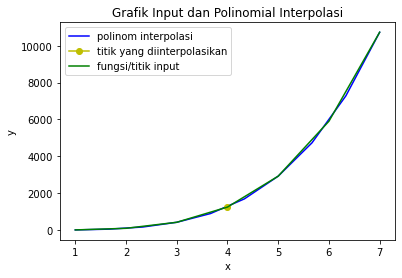

Try Again? (Y/N): n


In [30]:
bonus1()

Beberapa contoh lainnya:

Select your preferences, (1 = List, 2 = Fungsi): 1
list of x points: [5,7,11,13,17]
list of y points: [150,392,1452,2366,5202]
Input x value to be approximated: 9
Choose your preferred method (1 = Lagrange, 2 = NDD): 2
Forward = 1, Backward = 2: 1
Wanna print the DD table? (Y/N): Y
|   x |    y |   DD1 |   DD2 |   DD3 |   DD4 |
|-----+------+-------+-------+-------+-------|
|   5 |  150 |   121 |    24 |     1 |     0 |
|   7 |  392 |   265 |    32 |     1 |       |
|  11 | 1452 |   457 |    42 |       |       |
|  13 | 2366 |   709 |       |       |       |
|  17 | 5202 |       |       |       |       |
NDD Polynomial =  1.0*x**2*(x + 1)
For x = 9, using Forward NDD, y is approximately: 810.00000
Show (1 = table, 2 = plot) : 1
RESULT
|   x |    y |
|-----+------|
|   5 |  150 |
|   7 |  392 |
|   9 |  810 |
|  11 | 1452 |
|  13 | 2366 |
|  17 | 5202 |
Try Again? (Y/N): y
Select your preferences, (1 = List, 2 = Fungsi): 1
list of x points: [40,50,60,70,80]
list of y points: [31,73,124,

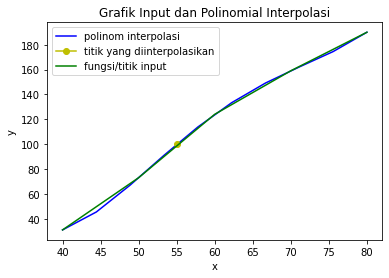

Try Again? (Y/N): y
Select your preferences, (1 = List, 2 = Fungsi): 2
Input function: x**3+4*x**2+4*x+1
lower bound: 1
upper bound: 5
part: 5
Input x value to be approximated: 2
Choose your preferred method (1 = Lagrange, 2 = NDD): 1
Lagrange polynomial interpolation =  3.5527136788005e-15*x**4 + 1.0*x**3 + 4.0*x**2 + 4.0*x + 1.00000000000011
for x = 2 using Lagrange, y is = 33.00000 
Show (1 = table, 2 = plot) : 2


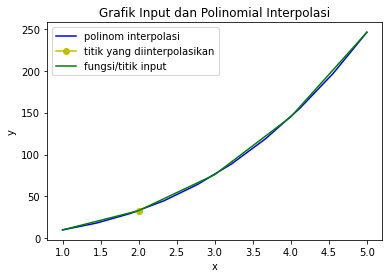

Try Again? (Y/N): n


In [28]:
bonus1()

# Nomor 2

Tabel data yang diberikan:

| Nilai | 30—40 | 40—50 | 50—60 | 60—70 | 80—90 | 90—100
| --- | --- | --- | --- | --- | --- | --- |
| Jumlah mahasiswa | 32 | 56 | 51 | 42 | 30 | 25

Tabel data yang nilainya sudah diubah dengan mengambil rata-ratanya

| Nilai | 35 | 45 | 55 | 65 | 85 | 95
| --- | --- | --- | --- | --- | --- | --- |
| Jumlah mahasiswa | 32 | 56 | 51 | 42 | 30 | 25

Masukan angka-angka pada variabel "Nilai" sebagai list bagi titik x dan angka-angka pada variabel "jumlah mahasiswa" sebagai list bagi titik y ke dalam input program.

Karena range yang diaproksimasi merupakan 55-65, maka mediannya adalah $\frac{55+65}{2}=\frac{120}{2}=60$. Masukan 60 sebagai nilai yang akan diaproksimasi.

Select your preferences, (1 = List, 2 = Fungsi): 1
list of x points: [35,45,55,65,85,95]
list of y points: [32,56,51,42,30,25]
Input x value to be approximated: 60
Choose your preferred method (1 = Lagrange, 2 = NDD): 2
Forward = 1, Backward = 2: 1
Wanna print the DD table? (Y/N): y
|   x |   y |   DD1 |         DD2 |          DD3 |          DD4 |         DD5 |
|-----+-----+-------+-------------+--------------+--------------+-------------|
|  35 |  32 |   2.4 | -0.145      |  0.00416667  | -6.83333e-05 | 8.33333e-07 |
|  45 |  56 |  -0.5 | -0.02       |  0.00075     | -1.83333e-05 |             |
|  55 |  51 |  -0.9 |  0.01       | -0.000166667 |              |             |
|  65 |  42 |  -0.6 |  0.00333333 |              |              |             |
|  85 |  30 |  -0.5 |             |              |              |             |
|  95 |  25 |       |             |              |              |             |
NDD Polynomial =  8.33333333333333e-7*x**5 - 0.000305833333333333*x**4 + 0.0

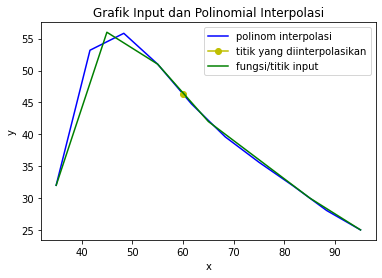

Try Again? (Y/N): y
Select your preferences, (1 = List, 2 = Fungsi): 1
list of x points: [35,45,55,65,85,95]
list of y points: [32,56,51,42,30,25]
Input x value to be approximated: 60
Choose your preferred method (1 = Lagrange, 2 = NDD): 1
Lagrange polynomial interpolation =  x**5/1200000 - 367*x**4/1200000 + 1063*x**3/24000 - 15149*x**2/4800 + 70203*x/640 - 911941/640
for x = 60 using Lagrange, y is = 46.27344 
Show (1 = table, 2 = plot) : 2


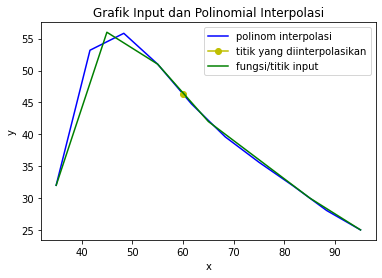

Try Again? (Y/N): n


In [31]:
bonus1()

Input dari tabel data sudah dimodifikasi dengan mengambil nilai tengah (median) dari masing-masing range nilai. Metode dari program tersebut secara terurut dari atas ke bawah merupakan Forward NDD, Backward NDD, dan Polinomial Lagrange.

Berdasarkan hasil tersebut, dapat disimpulkan bahwa hasil interpolasi berada di 46.27344. Output dari metode NDD (forward dan backward) dan metode Interpolasi Lagrange, adalah sama, tidak terdapat perbedaan, yakni tepat 46.27344.